### Instagram filter theory validation

I had an idea of cloning the Intagram filters (for no commercial reason, just personal research).

Created this notebook just to validate that instagram filters take into account the location, neighboring and shade of the original pixels. If the theory was false, the difference between an image **with** and an image **without** filter would carry no resemblance with the image itself, but rather a homogenous slab of odd color.

Since I believe my theory is validated, I'll try to re create the filters.

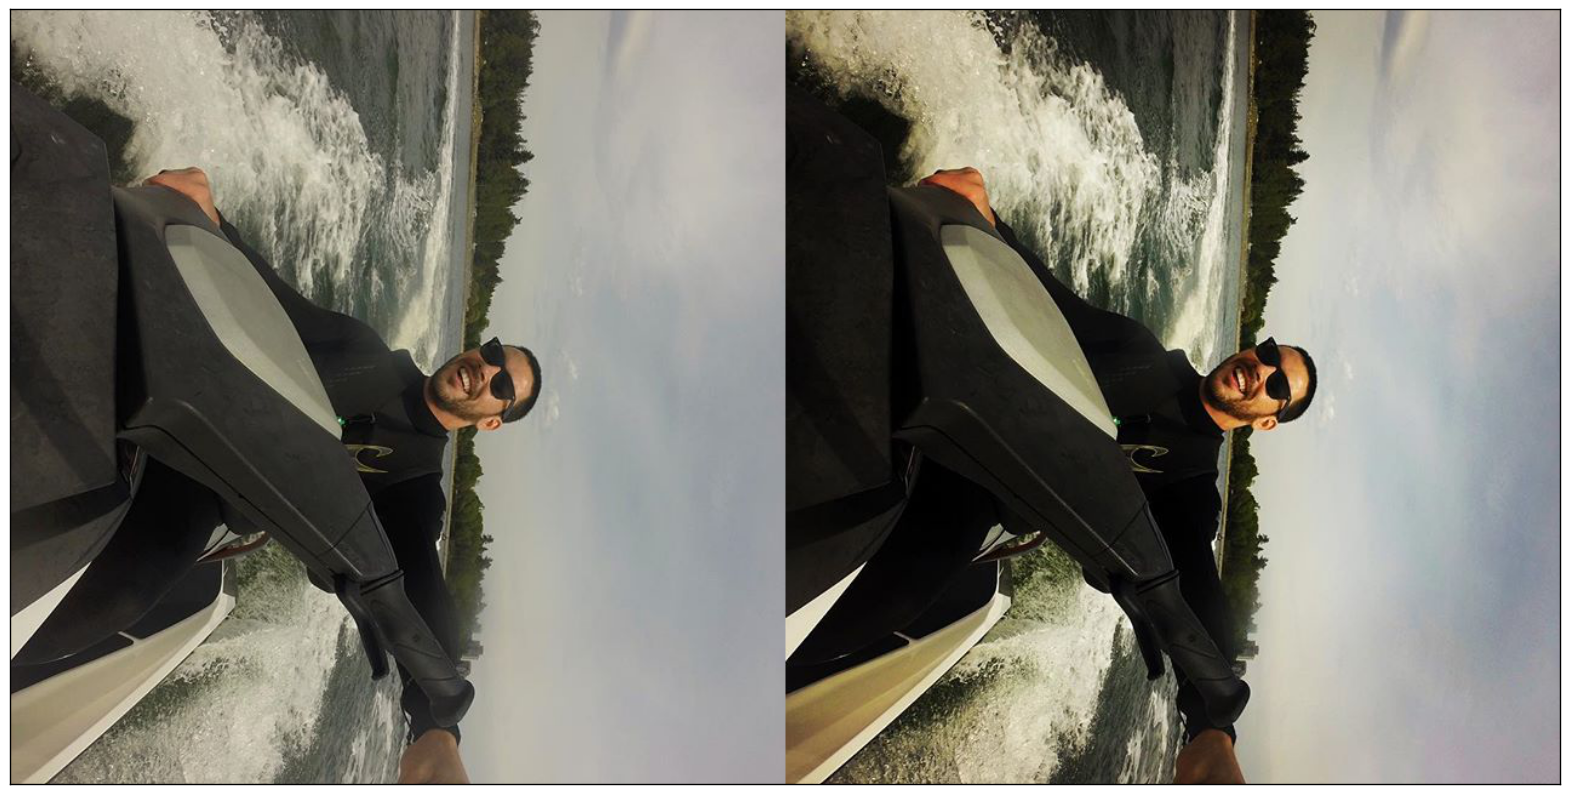

In [2]:
import scipy.ndimage
%matplotlib inline
import matplotlib.pyplot as plt
import numpy

def plotImage(image):
    plt.figure(figsize=(20,10))
    imagePlotting = plt.imshow(image)
    imagePlotting.axes.get_xaxis().set_visible(False)
    imagePlotting.axes.get_yaxis().set_visible(False)
    plt.show()

def makeImageStripe(images):
    result = numpy.zeros([width*2, height,3]);

    def copyIntoArray(origin, target, fromX, toX):
        target[...,0][fromX:toX] = 256-origin.T[0,...]
        target[...,1][fromX:toX] = 256-origin.T[1,...]
        target[...,2][fromX:toX] = 256-origin.T[2,...]

    copyIntoArray(images[0], result, 0, width)
    copyIntoArray(images[1], result, width, width*2)

    result = result.transpose(1,0,2)
    
    return result

jetskiOriginal = scipy.ndimage.imread("images/pre_filter.jpg")
jetskiWithFilter = scipy.ndimage.imread("images/post_filter.jpg")

width = len(jetskiOriginal[0])
height = len(jetskiOriginal)

plotImage(makeImageStripe([jetskiOriginal,jetskiWithFilter]))

Difference:


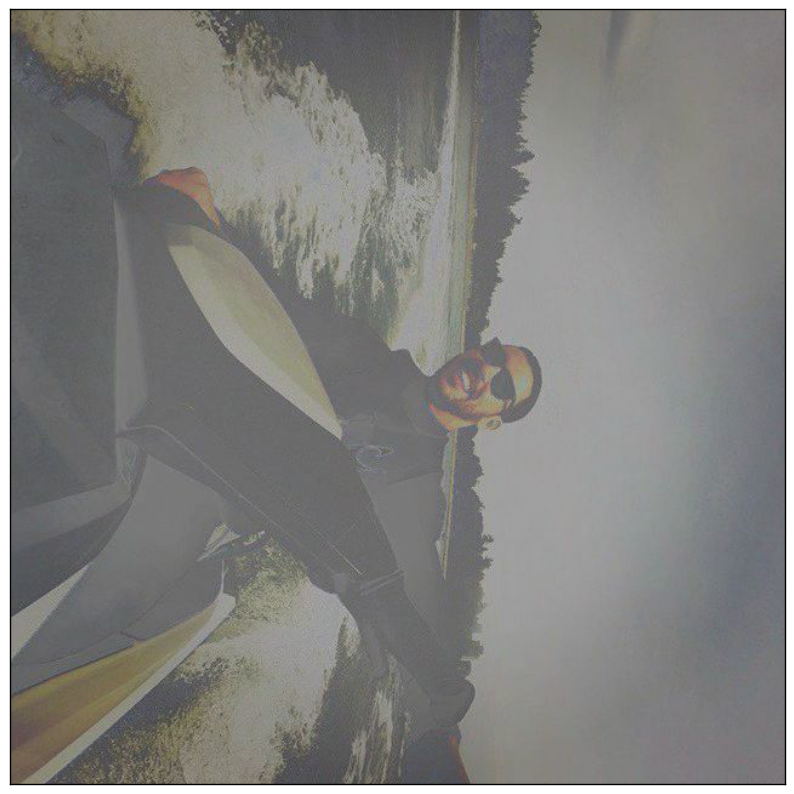

In [60]:
print("Difference:")
diff = jetskiWithFilter - jetskiOriginal
plotImage(diff+127) #127 = middle of 0-255 range. Just so that the plot wouldn't have ugly overflows

## Coltrol group

Now I'm gonna see what the difference would be between the original image, and a silly red filter I've created.

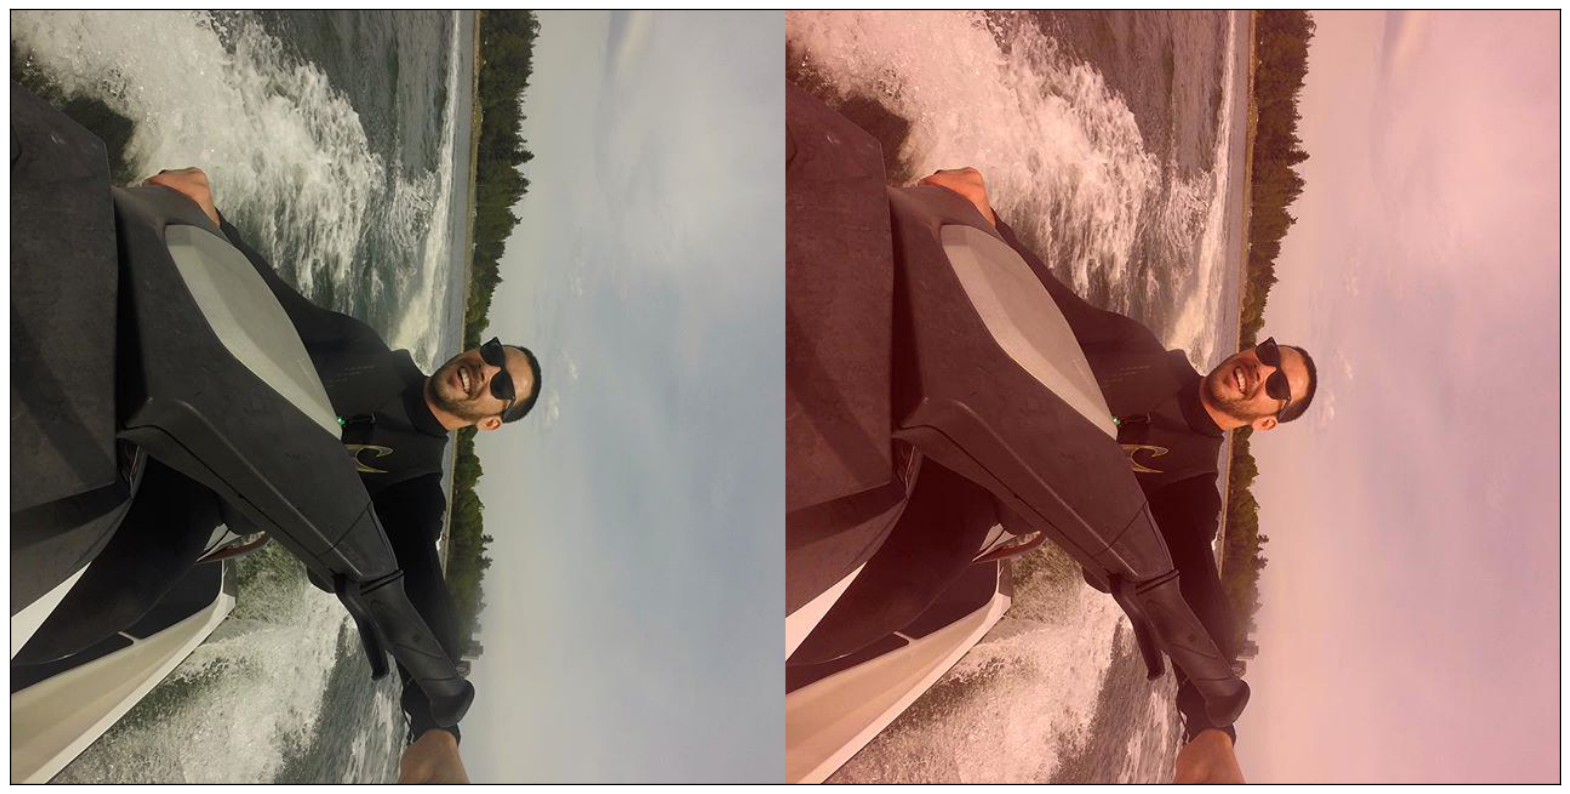

In [61]:
jetskiSolidFilter = scipy.ndimage.imread("images/solid_filter.jpg")

plotImage(makeImageStripe([jetskiOriginal,jetskiSolidFilter]))

Difference:


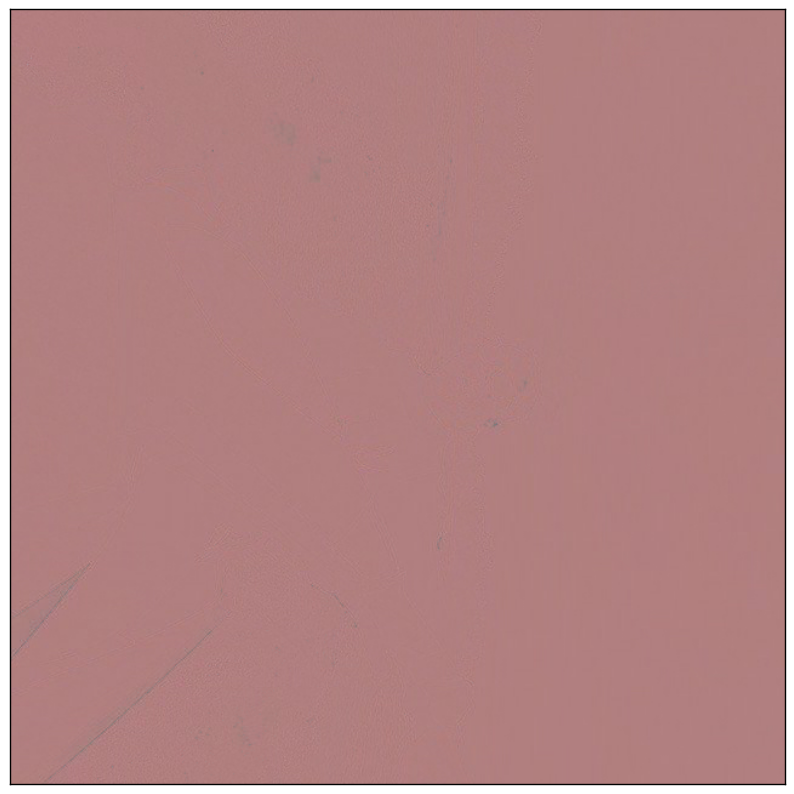

In [62]:
print("Difference:")
diff = jetSkiSolidFilter - jetskiOriginal
plotImage(diff+127)

# NICE. Pretty much no resemblance (only some overflows)

## Then I applied an authentic instagram filter to a solid white image and got this:

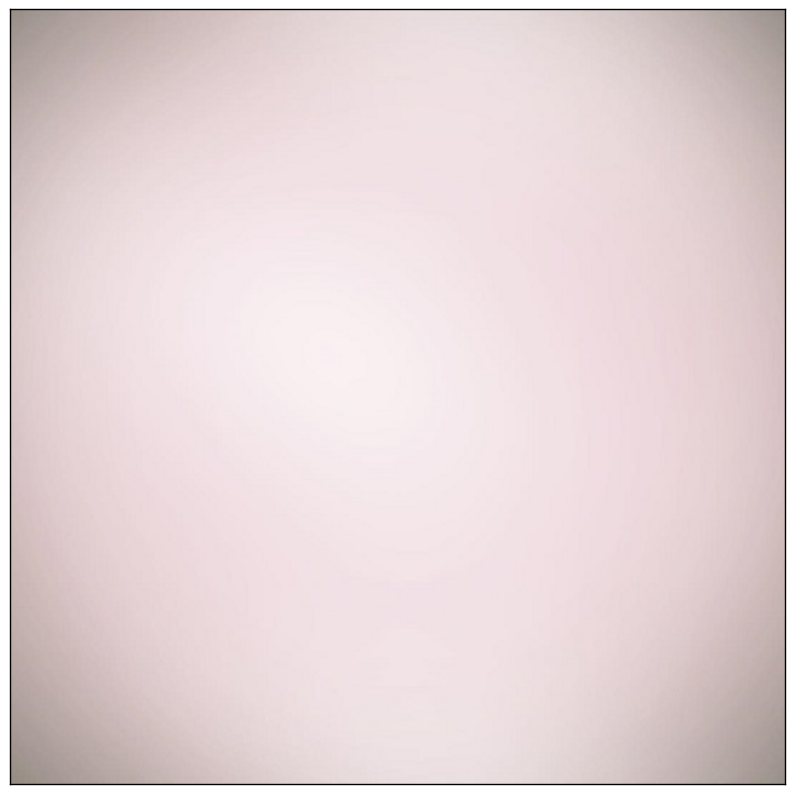

In [63]:
instaFilter = scipy.ndimage.imread("images/instagram_filter.jpg")

plotImage(instaFilter)

## ... And applied it to the same image:

though slightly lighter, for there not to be too much overflow in any channel (going below zero or over 255)

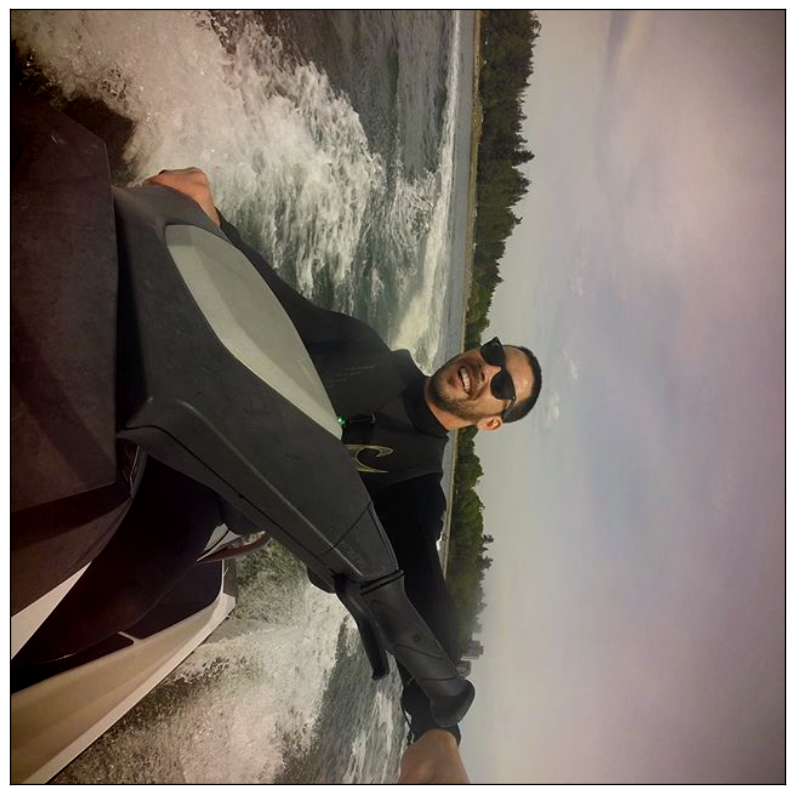

In [64]:
filt = 0-instaFilter
copy = jetskiOriginal.copy()

for x in range(width):
    for y in range(height):
        for z in range(3):
            copy[x][y][z] = max(int(copy[x][y][z]) - max(int(filt[x][y][z])-30,0), 0)
            
plotImage(copy)

# Now let's check the difference:

Difference:


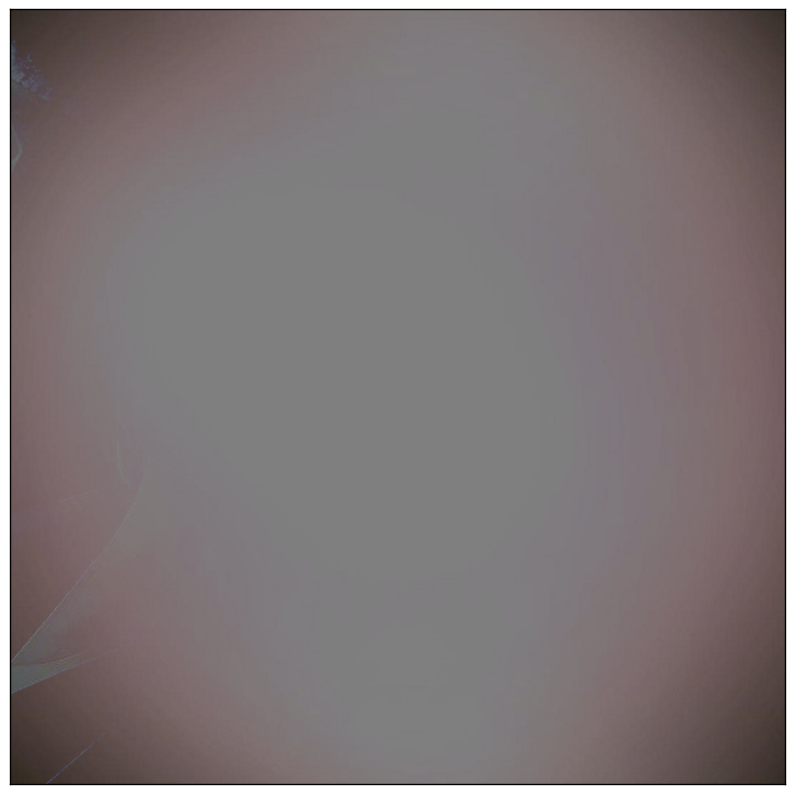

In [67]:
print("Difference:")
diff = copy - jetskiOriginal
plotImage(diff+127) # Again, middle, for there not to be too much overflow

# ... And got a difference that does not resemble the original image :)